# AI Extenship Assignment-3

Part 1: Using CNN Model 
Part 2: Done using Transfer Learning

**Suriyaprakash G 20BCE0077**

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

Importing the dataset from kaggle

In [3]:
!kaggle datasets download akash2907/bird-species-classification

100% 1.37G/1.37G [00:44<00:00, 44.5MB/s]
100% 1.37G/1.37G [00:44<00:00, 33.2MB/s]


Unzipping the data

In [4]:
!unzip '/content/bird-species-classification.zip'

Archive:  /content/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/test_data/test_data',
                                      target_size=(500, 500),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(500, 500),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 150 images belonging to 16 classes.


In [42]:
lt = train.class_indices
print(lt)

# taking the lust if keys in the train.class_indices
name = list(lt.keys())
print(name)

{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}
['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']


#Part 1: Using CNN Model

In [ ]:
# Imports requied for CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
# CREATING CNN MODEL

# Initializing the seq model
model = Sequential()

# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(500, 500, 3)))
# Normalizing the conv layer output
model.add(BatchNormalization())

# Selecting the max values
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropping the unwanted 20% of data
model.add(Dropout(0.2))

model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

# Hidden layers
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

# Output layer for 16 species
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 498, 498, 12)      336       
                                                                 
 batch_normalization_20 (Bat  (None, 498, 498, 12)     48        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 249, 249, 12)     0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 249, 249, 12)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 247, 247, 24)      2616      
                                                                 
 batch_normalization_21 (Bat  (None, 247, 247, 24)    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Early stopping if the model has learn before completing the n no. of epochs
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [ ]:
history = model.fit(train,batch_size=8,validation_data=test,epochs=50,callbacks=early_stop)

Epoch 1/50
20/20 [==============================] - 96s 5s/step - loss: 2.8331 - accuracy: 0.1146 - val_loss: 3.0953 - val_accuracy: 0.0867
Epoch 2/50
20/20 [==============================] - 87s 4s/step - loss: 2.6114 - accuracy: 0.1592 - val_loss: 2.9551 - val_accuracy: 0.0200
Epoch 3/50
20/20 [==============================] - 88s 5s/step - loss: 2.4937 - accuracy: 0.2420 - val_loss: 3.1847 - val_accuracy: 0.0467
Epoch 4/50
20/20 [==============================] - 86s 4s/step - loss: 2.2575 - accuracy: 0.3567 - val_loss: 3.8601 - val_accuracy: 0.0800
Epoch 5/50
20/20 [==============================] - 87s 4s/step - loss: 2.1197 - accuracy: 0.3694 - val_loss: 3.4907 - val_accuracy: 0.0600
Epoch 6/50
20/20 [==============================] - 88s 4s/step - loss: 2.0730 - accuracy: 0.4076 - val_loss: 2.9945 - val_accuracy: 0.0467
Epoch 7/50
20/20 [==============================] - 89s 5s/step - loss: 1.8711 - accuracy: 0.4268 - val_loss: 2.9481 - val_accuracy: 0.1467
Epoch 8/50
20/20 [==

Saving the model

In [ ]:
model.save('birdsspiecs.h5')

Testing

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 22ms/step
14


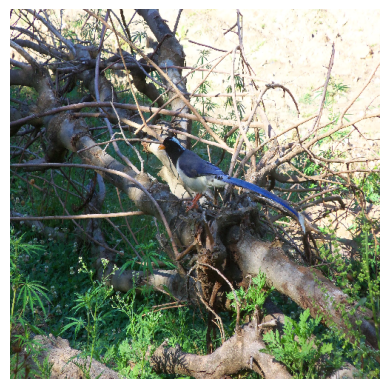


Species Prediction: rebimg


In [ ]:
# Testing 1
img1 = image.load_img('/content/rebimg.jpeg',target_size=(500,500))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)

# Display the image
plt.imshow(img1[0].astype(np.uint8))
plt.axis('off')
plt.show()

output = name

print("\nSpecies Prediction: "+output[pred])

19/19 - 34s - loss: 3.7508 - accuracy: 0.2667 - 34s/epoch - 2s/step
Test accuracy: 0.2666666805744171


Text(0.5, 1.0, 'Training and Validation Accuracy')

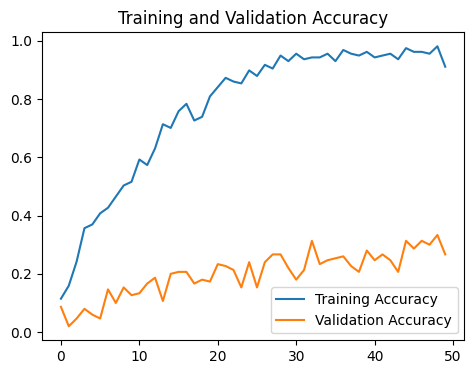

In [ ]:
test_loss, test_acc = model.evaluate(test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss curves during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=50
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Part 2: Using Transfer Learning - ResNet50

In [7]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np

In [5]:
train_path = "/content/train_data/train_data"
test_path = "/content/test_data/test_data"


In [48]:
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255) 

In [49]:
train = train_gen.flow_from_directory(train_path, target_size=(500,500), batch_size=22, class_mode='categorical')

test = test_gen.flow_from_directory(test_path, target_size=(500,500), batch_size=22, class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


ResNet50

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [13]:
resnet = ResNet50(include_top=False,input_shape=(500,500,3))

In [14]:
for layer in resnet.layers:
  layer.trainable=False

In [15]:
for layer in resnet.layers:
  print(layer)

In [16]:
x = Flatten()(resnet.output)

In [17]:
out = Dense(16, activation='softmax')(x)

In [18]:
res_model = Model(inputs=resnet.input,outputs=out)

In [19]:
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 506, 506, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 250, 250, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [20]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
# Early stopping if the model has learn before completing the n no. of epochs
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [29]:
history=res_model.fit(train,epochs=50,validation_data=test,steps_per_epoch=len(train),
              validation_steps=len(test), callbacks=early_stop)

Epoch 1/50
7/7 [==============================] - 133s 21s/step - loss: 126.9416 - accuracy: 0.1200 - val_loss: 128.9875 - val_accuracy: 0.1783
Epoch 2/50
7/7 [==============================] - 90s 14s/step - loss: 88.7741 - accuracy: 0.2133 - val_loss: 67.6701 - val_accuracy: 0.1083
Epoch 3/50
7/7 [==============================] - 92s 14s/step - loss: 76.8346 - accuracy: 0.1867 - val_loss: 97.0520 - val_accuracy: 0.0637
Epoch 4/50
7/7 [==============================] - 92s 14s/step - loss: 71.3125 - accuracy: 0.2133 - val_loss: 132.0881 - val_accuracy: 0.1338
Epoch 5/50
7/7 [==============================] - 91s 14s/step - loss: 87.2684 - accuracy: 0.1933 - val_loss: 95.7307 - val_accuracy: 0.1529
Epoch 6/50
7/7 [==============================] - 92s 14s/step - loss: 64.2464 - accuracy: 0.2267 - val_loss: 86.5039 - val_accuracy: 0.0764
Epoch 7/50
7/7 [==============================] - 92s 14s/step - loss: 76.7761 - accuracy: 0.2267 - val_loss: 106.6996 - val_accuracy: 0.1146
Epoch 8/

In [30]:
res_model.save('birdsspiecsresnet50.h5')

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 28ms/step
4


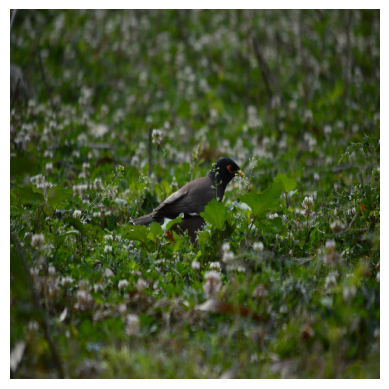


Species Prediction: cmnmyn


In [47]:
# Testing 1
img1 = image.load_img('/content/cmnyn.jpg',target_size=(500,500))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(res_model.predict(img1))
print(pred)

# Display the image
plt.imshow(img1[0].astype(np.uint8))
plt.axis('off')
plt.show()

output = name

print("\nSpecies Prediction: "+output[pred])

In [38]:
history.history['accuracy']

[0.11999999731779099,
 0.2133333384990692,
 0.18666666746139526,
 0.2133333384990692,
 0.19333332777023315,
 0.2266666740179062,
 0.2266666740179062,
 0.19333332777023315,
 0.30000001192092896,
 0.2933333218097687,
 0.3266666531562805,
 0.2933333218097687,
 0.3799999952316284,
 0.4866666793823242,
 0.41333332657814026,
 0.46000000834465027,
 0.46666666865348816,
 0.5,
 0.3333333432674408,
 0.3733333349227905,
 0.4399999976158142,
 0.3933333456516266,
 0.40666666626930237,
 0.3400000035762787,
 0.4000000059604645,
 0.40666666626930237]

8/8 - 51s - loss: 55.8366 - accuracy: 0.1592 - 51s/epoch - 6s/step
Test accuracy: 0.15923567116260529


Text(0.5, 1.0, 'Training and Validation Accuracy')

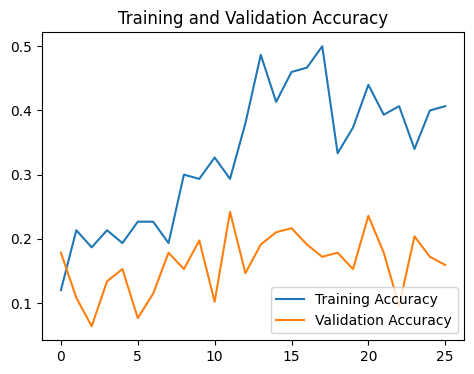

In [39]:
test_loss, test_acc = res_model.evaluate(test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss curves during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=26
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')